<h1 align="center"><font color="yellow">Linear Regression with PyTorch</font></h1>

<font color="yellow">Data Scientist.: PhD.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [Pytorch Tutorial](https://www.youtube.com/@datahackerrs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
x_data = np.array([1, 2, 3, 4, 5])
y_data = x_data * 2


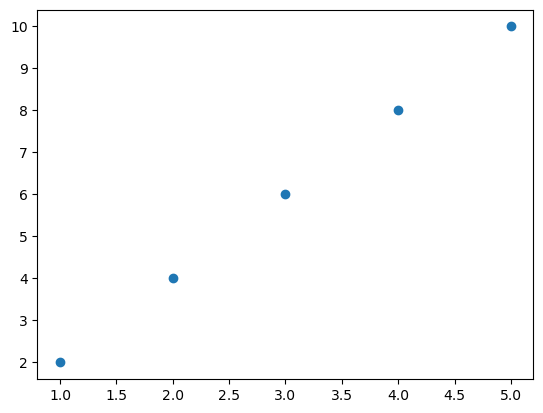

In [3]:
plt.scatter(x_data, y_data)
plt.show()

Criamos uma função de propagação direta a partir da seguinte fórmula: $y = mx + b~~$ ou $~~ \hat{y} = x w + b$.

In [4]:
def forward(x, w, b=0):
    y_hat = x*w + b
    return y_hat


Criamos uma função de Erro quadrático para o cálculo posterior do erro quadrático médio que é calculado como: $\sum_{i=1}^{n}(\hat{y}_i - y_i)^2$.


In [5]:
def loss(y_hat, y):
    return (y_hat - y)**2


Iteramos para `w` que vá de $0$ a $4$ com passo de $0.1$ e calcule a perda dependendo do $\hat{y}$ que obtivemos fazendo a propagação para frente (`Forward propagation`). Guardamos todos os `losses` e `w` para plotagens posteriores.

In [6]:
all_w = []
all_loss = []

for w in np.arange(0, 4, 0.1):
  l_sum = 0

  for i in range(len(x_data)):
    y_hat = forward(x_data[i], w)
    l = loss(y_hat, y_data[i])

    l_sum += l
  
  all_w.append(w)
  all_loss.append(l_sum / len(y_data))
  

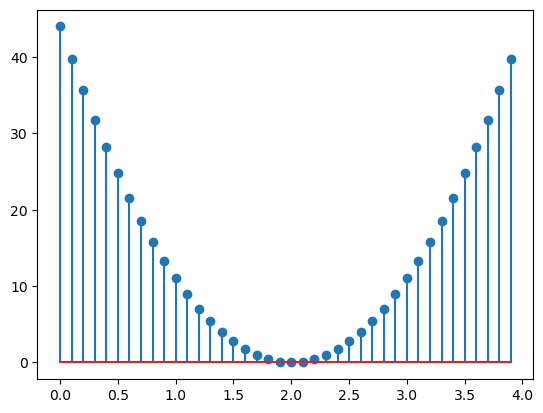

In [7]:
plt.stem(all_w, all_loss)
plt.show()


Criando tensores a partir dos dados que criamos e remodelando-os para serem `(-1, 1)`.

In [8]:
x_torch = torch.FloatTensor(x_data).reshape(-1, 1)

y_torch = torch.FloatTensor(y_data).reshape(-1, 1)

In [9]:
x_torch

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

In [11]:
x_torch.shape

torch.Size([5, 1])

In [10]:
y_torch

tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])

Defina o peso, `w`, como `5` e o viés, `b`, como `3` e defina a opção `requires_grad` como sendo `True` para o cálculo do gradiente automático.


In [12]:
w = torch.tensor(5., requires_grad=True)

b = torch.tensor(3., requires_grad=True)


Defina a taxa de Aprendizado ou Alfa:

In [13]:
lr = 0.05

Iteramos $1000$ vezes e fazemos a otimização para os parâmetros do modelo `w` e `b`. Este processo consiste em $5$ etapas:


1. Faça a propagação direta (`Forward propagation`) `x_torch * w + b`

2. Calcule o `MSE`

3. Faça a retropropagação (`Backpropagation`) `.backward()` na Loss que foi calculada

4. Atualize os parâmetros de `peso` e `viés`

5. Zere os gradientes

In [14]:
all_w = []
all_loss = []

for i in range(1000):
  y_hat = x_torch * w + b

  loss = torch.sum(torch.pow(y_torch - y_hat, 2) / len(y_torch))
  loss.backward()
  
  all_w.append(w.item())
  all_loss.append(loss.item())
  with torch.no_grad():
    w -= lr * w.grad  # w = w - lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

    all_w.append(w)
    all_loss.append(loss)
    

<font color="orange">Faça algumas predições em `x_torch` usando `w` e `b`.</font>

In [15]:
y_pred = x_torch * w + b

<font color="orange">Podemos ver que a predição é correta:</font>

In [16]:
y_pred

tensor([[ 2.0000],
        [ 4.0000],
        [ 6.0000],
        [ 8.0000],
        [10.0000]], grad_fn=<AddBackward0>)

In [17]:
y_data

array([ 2,  4,  6,  8, 10])

<font color="orange">Traçamos os valores originais como pontos verdes e a previsão com uma linha azul:</font>

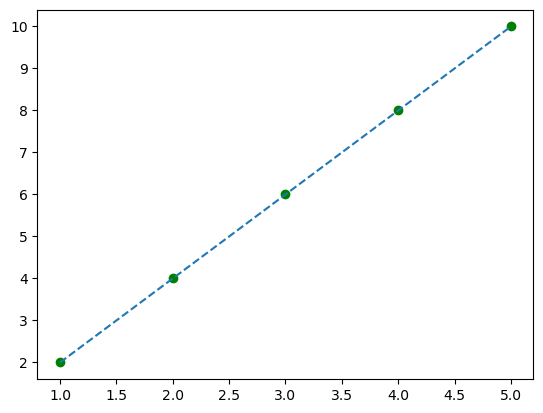

In [18]:
plt.plot(x_torch, y_torch, 'go')
plt.plot(x_torch, y_pred.detach().numpy(), '--')
plt.show()


<font color="orange">Também podemos ver que o `peso` (weight) e o `viés` foram calculados corretamente:</font>

In [20]:
w

tensor(2.0000, requires_grad=True)

In [21]:
b

tensor(7.2257e-07, requires_grad=True)

<font color="orange">Teste-o no número `3.5`, devemos obter `7 = x * 2 + 0`, onde `2` representa `w` ou peso e `0` representa o viés ou `b`.</font>

In [22]:
x_test = torch.Tensor([3.5])

In [24]:
x_test * w + b

tensor([7.], grad_fn=<AddBackward0>)

# <font color="red">Implementação completa com Pytorch</font>

<font color="orange">Criamos um conjunto aleatório de números, `50` valores $x$ gerados aleatoriamente no intervalo de `[0, 10]`. Definindo `y = x * 3 - 4`.</font>

In [25]:
x = np.random.rand(50)
x = x * 10


In [26]:
x

array([0.16104752, 6.76623587, 8.86214773, 0.77113037, 0.14612034,
       5.99587157, 2.89423233, 3.1079768 , 8.58430092, 8.87607643,
       1.24102188, 8.67635897, 5.63626937, 6.55975185, 9.65188808,
       4.85615767, 7.14598577, 2.68453571, 0.79503019, 5.10282763,
       9.49205271, 4.49296586, 3.02567897, 3.95875084, 3.23444484,
       8.40029729, 5.90214103, 4.32204013, 1.52388586, 3.50257787,
       3.36437157, 8.94252533, 4.86516949, 3.63175748, 5.16271091,
       4.85995059, 3.17759291, 4.30726055, 2.88076682, 4.64647016,
       5.38171354, 3.63659971, 2.55041292, 6.48550533, 9.74075975,
       7.32815894, 7.84302655, 4.01672957, 2.44841783, 3.65645735])

In [28]:
y = x * 3 - 4
y += np.random.randn(50) # randn --> Gera 50 valores aleatórios a partir de uma Distribuição Normal padrão (média 0 e desvio padrão igual a 1)


In [29]:
y

array([-4.58872551, 16.30376509, 21.78748438, -0.0999493 , -2.96752579,
       14.64512416,  4.71685171,  3.91066679, 22.84997771, 23.43187534,
        0.3595249 , 21.16867003, 11.96071762, 14.48319384, 24.90640437,
       12.01674909, 18.85492324,  4.89043895, -1.44283694, 12.4271323 ,
       22.45522032,  8.0465825 ,  4.86204669,  7.77388568,  5.52610585,
       21.98733526, 13.27580757,  9.60707156,  1.20286418,  8.10658813,
        5.43348487, 23.21390391, 11.5014061 ,  8.06018083, 11.43862122,
       10.40931593,  5.01777367,  9.59192985,  5.79862446, 10.8456673 ,
       12.64762044,  5.70564141,  1.81377157, 16.63417912, 26.25334377,
       17.46840559, 17.85354208,  8.34347549,  2.22886348,  7.44295981])

Gere a classe `Linear Model` usando `torch.nn.Module`. Aqui criamos uma inicialização onde criamos uma `camada linear` que posteriormente utilizamos na `função forward`.


In [30]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)
    

In [31]:
# x e y para Tensor:
x_torch = torch.FloatTensor(x).reshape(-1, 1)
y_torch = torch.FloatTensor(y).reshape(-1, 1)


<font color="orange">Chame a `classe LinearModel` que criamos e crie uma `Função Loss` e também um `optimizer` que será utilizado para otimizar ou atualizar os `pesos`.</font>

In [32]:
# Instanciando a minha classe:
model = LinearModel()

# Função Loss:
criterion = torch.nn.MSELoss()

# Instanciamos nosso optimizador:
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01
                           )


Treinamos o modelo por `1000` épocas.

1. Faça a `Propagação para frente` (Forward Propagation)

2. Calcule a `perda` (Loss)

3. Retropropagação (Backpropagation)

4. Atualize os parâmetros usando `optimizer.step()`

5. Zere os gradientes

In [33]:
all_loss = []

for epoch in range(1000):
  y_hat = model(x_torch)

  loss = criterion(y_hat, y_torch)
  loss.backward()

  all_loss.append(loss.item())

  optimizer.step()
  optimizer.zero_grad()

<font color="orange">Fazemos algumas previsões sobre: `x_torch`:</font>


In [40]:
len(all_loss)

1000

In [34]:
y_pred = model.forward(x_torch)


In [35]:
y_pred

tensor([[-3.2718],
        [16.3385],
        [22.5611],
        [-1.4605],
        [-3.3161],
        [14.0513],
        [ 4.8428],
        [ 5.4774],
        [21.7362],
        [22.6024],
        [-0.0654],
        [22.0095],
        [12.9837],
        [15.7254],
        [24.9057],
        [10.6676],
        [17.4659],
        [ 4.2203],
        [-1.3895],
        [11.4000],
        [24.4312],
        [ 9.5893],
        [ 5.2331],
        [ 8.0033],
        [ 5.8529],
        [21.1899],
        [13.7731],
        [ 9.0819],
        [ 0.7744],
        [ 6.6490],
        [ 6.2386],
        [22.7997],
        [10.6944],
        [ 7.0325],
        [11.5778],
        [10.6789],
        [ 5.6841],
        [ 9.0380],
        [ 4.8029],
        [10.0451],
        [12.2280],
        [ 7.0469],
        [ 3.8221],
        [15.5050],
        [25.1696],
        [18.0068],
        [19.5354],
        [ 8.1754],
        [ 3.5192],
        [ 7.1058]], grad_fn=<AddmmBackward0>)

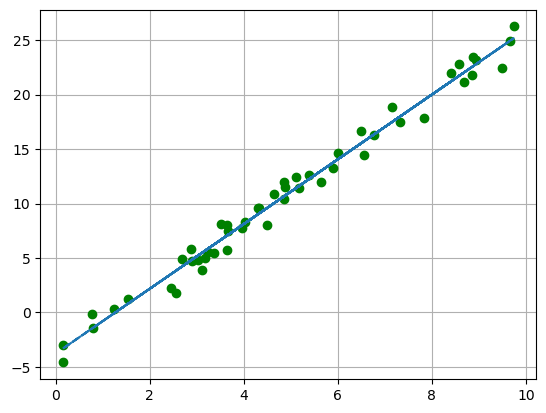

In [37]:
plt.plot(x_torch, y_torch, 'go')
plt.plot(x_torch, y_pred.detach().numpy(), '--')
plt.grid(True)
plt.show()


<font color="orange">Imprima os parâmetros `w` e `b` que estão armazenados no `model.named_parameters()`:</font>

In [38]:
for name, param in model.named_parameters():
    print(name, param)
    

linear.weight Parameter containing:
tensor([[2.9689]], requires_grad=True)
linear.bias Parameter containing:
tensor([-3.7499], requires_grad=True)


<font color="orange">Plotamos a Loss:</font>

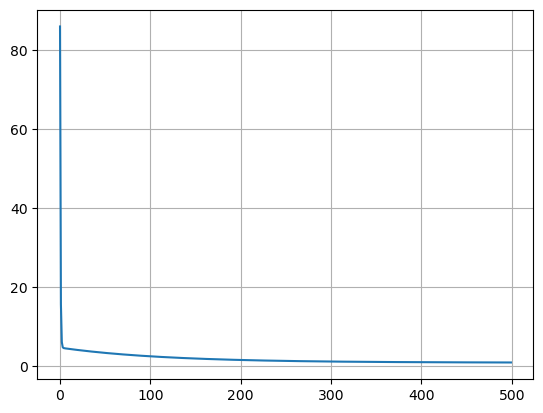

In [44]:
plt.plot(np.arange(0, 500, 1), all_loss[:500])
plt.grid(True)
plt.show()


In [45]:
all_loss[:10]

[85.9783706665039,
 15.659223556518555,
 6.140814304351807,
 4.828563690185547,
 4.624084949493408,
 4.5693488121032715,
 4.5350542068481445,
 4.503751277923584,
 4.47307825088501,
 4.442716121673584]

In [46]:
all_loss[-1]

0.9245436191558838

In [47]:
all_loss[0]

85.9783706665039